📂 Please upload the housing dataset (CSV format).


Saving housing.csv to housing (2).csv

🔹 First 5 rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

🔹 Da

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


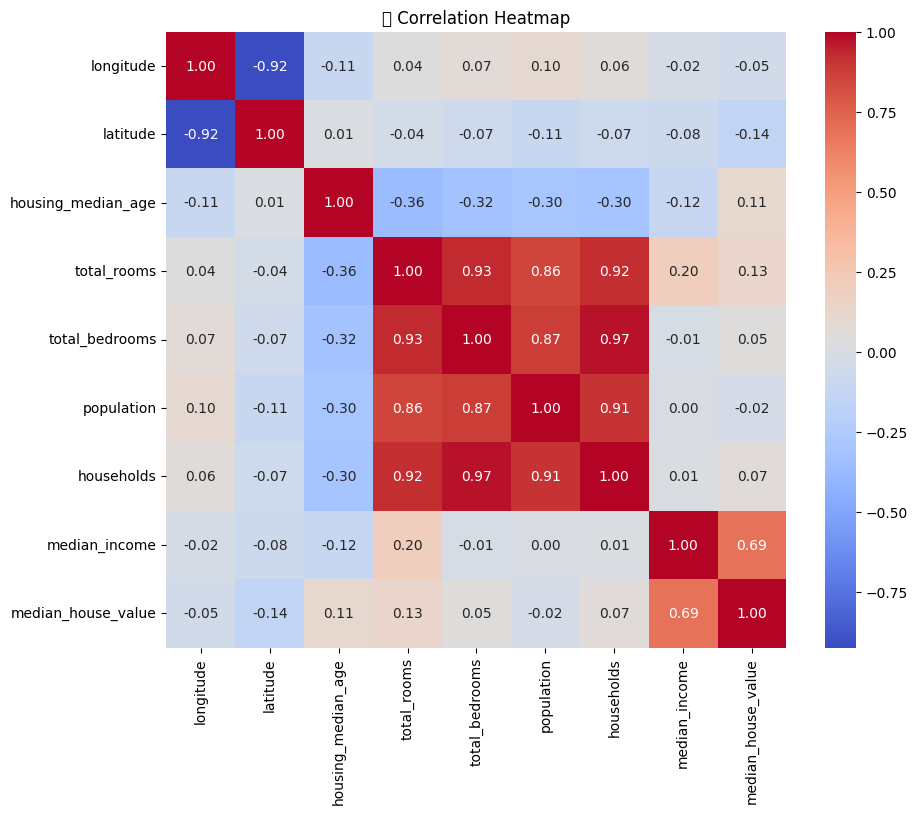

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


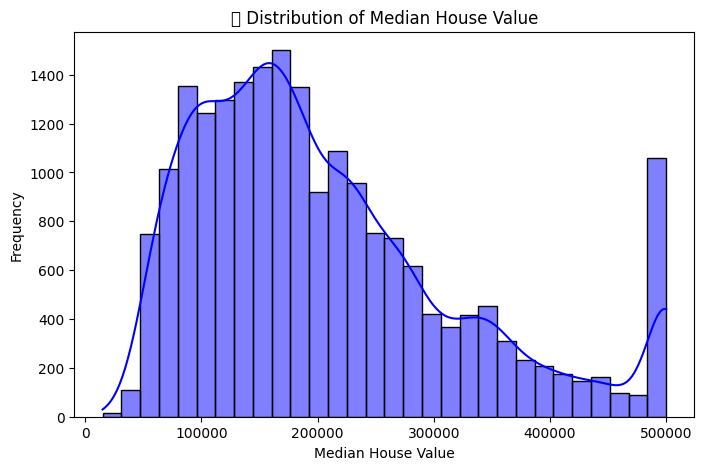

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


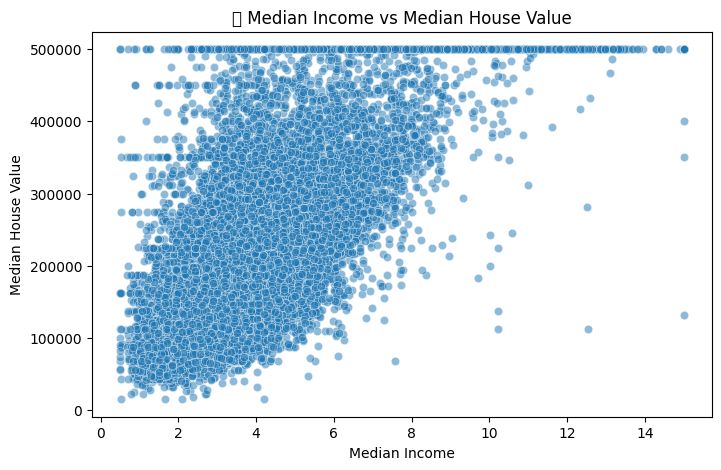


📊 Mean Median House Value: 206855.82
📊 Median Median House Value: 179700.00
📊 Standard Deviation of Median House Value: 115392.82

📈 T-Statistic: 8.54, P-value: 0.0000
📌 Reject the null hypothesis: Mean Median House Value is significantly different from $200,000.

📉 Correlation between Median Income and Median House Value: 0.69

📊 Linear Regression Metrics:
📉 Root Mean Squared Error (RMSE): 84209.01
📈 R-Squared: 0.46


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


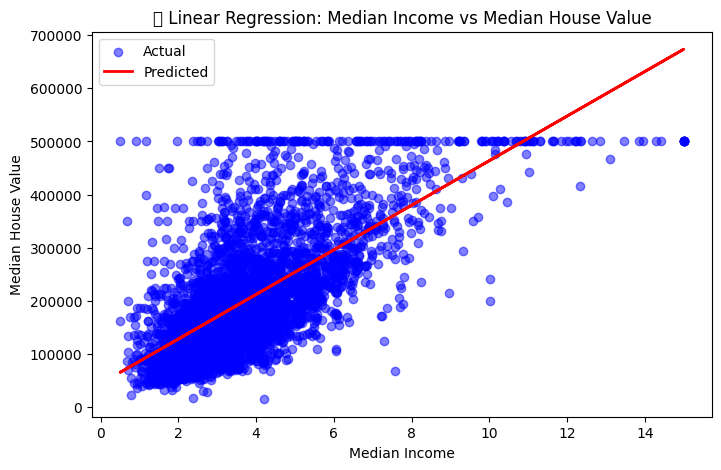

<ipython-input-4-f696de6f1488>:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["HighValue"], palette=["red", "green"])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


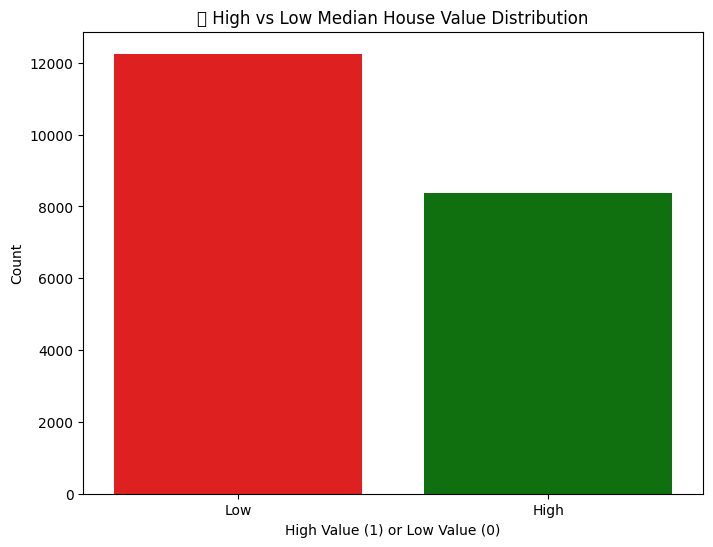


✅ Statistical analysis completed successfully!


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

# Step 1: Upload dataset
print("📂 Please upload the housing dataset (CSV format).")
uploaded = files.upload()

# Step 2: Read the dataset
filename = list(uploaded.keys())[0]  # Get the uploaded filename
data = pd.read_csv(filename)

# Display first few rows
print("\n🔹 First 5 rows of the dataset:")
print(data.head())

# Basic Exploration
print("\n🔹 Dataset Shape:", data.shape)
print("\n🔹 Columns:", data.columns)
data.info()
print("\n🔹 Statistical Summary:\n", data.describe())

# Step 3: Handling Missing Values
print("\n🛠️ Handling missing values...")
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = data[col].fillna(data[col].mode()[0])  # Fill categorical with mode
    else:
        data[col] = data[col].fillna(data[col].mean())  # Fill numerical with mean

print("\n✅ Updated Dataset Info After Cleaning:")
data.info()

# Step 4: Visualizations

## 1️⃣ Correlation Heatmap (Fixed)
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("🔹 Correlation Heatmap")
plt.show()

## 2️⃣ Distribution of Median House Value
plt.figure(figsize=(8, 5))
sns.histplot(data['median_house_value'], kde=True, bins=30, color="blue")
plt.title("🔹 Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

## 3️⃣ Scatter Plot: Median Income vs Median House Value
plt.figure(figsize=(8, 5))
sns.scatterplot(x='median_income', y="median_house_value", data=data, alpha=0.5)
plt.title("🔹 Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

# Step 5: Statistical Analysis
mean_value = np.mean(data['median_house_value'])
median_value = np.median(data['median_house_value'])
std_dev_value = np.std(data['median_house_value'])

print(f"\n📊 Mean Median House Value: {mean_value:.2f}")
print(f"📊 Median Median House Value: {median_value:.2f}")
print(f"📊 Standard Deviation of Median House Value: {std_dev_value:.2f}")

# Step 6: Hypothesis Testing
population_mean = 200000
t_stat, p_value = stats.ttest_1samp(data['median_house_value'], population_mean)
print(f"\n📈 T-Statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("📌 Reject the null hypothesis: Mean Median House Value is significantly different from $200,000.")
else:
    print("📌 Fail to reject the null hypothesis: No significant difference from $200,000.")

# Step 7: Correlation Analysis
corr_income_value = numeric_data.corr().loc["median_income", "median_house_value"]
print(f"\n📉 Correlation between Median Income and Median House Value: {corr_income_value:.2f}")

# Step 8: Linear Regression Analysis
X = data[['median_income']]
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Metrics
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Linear Regression Metrics:")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📈 R-Squared: {r2:.2f}")

# Step 9: Visualization of Regression
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
plt.title("🔹 Linear Regression: Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

# Step 10: Predicting High/Low House Values
threshold = mean_value
data["HighValue"] = data['median_house_value'].apply(lambda x: 1 if x > threshold else 0)

plt.figure(figsize=(8, 6))
sns.countplot(x=data["HighValue"], palette=["red", "green"])
plt.title("🔹 High vs Low Median House Value Distribution")
plt.xlabel("High Value (1) or Low Value (0)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Low", "High"])
plt.show()

print("\n✅ Statistical analysis completed successfully!")
